*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/2_function_distribution.ipynb)*

# Time Adverbial Distribution and Collocations
## Function Distribution
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Fri 12 Jun 2020 13:02:39 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# see config.py for variables
# config.py is used across the notebooks 
# for the article project
from config import *

## Deviation of Proportions

Now we'll look to see how representative the datasample is across the<br>
Hebrew Bible. Have the selection requirements negatively affected any of the books?

In [13]:
# make a cross-tabulation from function to 
# book, n_pa, n_heads, and n_daughters to 
# enable selection of data as needed

by_book = pd.pivot_table(
    funct_sample, 
    index='s_function', 
    columns=['n_phrase_atoms', 'n_heads', 'n_relas', 'parsed', 'book'], 
    aggfunc='size', 
    fill_value=0
)

# result is a multi-index df
by_book.head()

n_phrase_atoms    1                                                ...  12  \
n_heads            1                                               ...   2   
n_relas            0                                               ...   0   
parsed             0                                               ...   0   
book           1 Kgs 1 Sam 2 Kgs 2 Sam Deut Eccl Ezek Gen Isa Jer  ... Gen   
s_function                                                         ...       
Adju               1     0     0     0    0    0    0   0   0   0  ...   0   
Cmpl               0     0     0     0    0    0    1   2   1   0  ...   1   
Loca               0     0     0     0    0    0    0   0   0   0  ...   0   
Objc               0     0     0     0    0    2    1   6   0   1  ...   0   
Subj               1     1     1     2    2   13    1   2   3   0  ...   0   

n_phrase_atoms                        13    14          15  16  
n_heads            4             5     4     5           1   6  
n_relas            0             0     0     0           0   0  
parsed             0             0     0     0           0   0  
book           1 Kgs 2 Chr Jer Gen 2 Kgs 1 Chr 2 Kgs 2 Chr Jer  
s_function                                                      
Adju               0     0   0   0     0     0     0     0   0  
Cmpl               1     0   0   0     0     0     0     0   0  
Loca               0     0   0   0     0     0     0     0   0  
Objc               0     1   0   0     0     0     1     1   0  
Subj               0     0   1   1     1     1     0     0   1  

[5 rows x 1108 columns]

### Does the sample selection affect book-by-book representation of functions?

In [14]:
# exp_prop is a table of ratios which state 
# what proportion of a function's total uses is represented within a given book
# the observed proportion will be that subset of phrases that fit our selection
# criteria, i.e. na=1, nh=1, nd=0
exp_freq = by_book.groupby(axis=1, level='book').sum() # group by book column
exp_prop = exp_freq.div(exp_freq.sum(1), 0)

# observed proportion is the ratio of the selected sample function's
# total representation within a given book: in this case only functions
# which have 1 atom, 1 head, 0 relas, and parse value of 1
obv_freq = by_book[(1, 1, 0, 1)] # select multindex
obv_prop = obv_freq.div(obv_freq.sum(1), 0)

# the deviation of proportions will be the DIFFERENCE between the expected ratios 
# (calculated across the whole dataset) and the ratios across the selected subset
# of phrases
deviation_prop = round(exp_prop - obv_prop, 2)

In [15]:
exp_freq

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,420,309,169,515,237,235,48,95,377,86,...,20,160,432,8,244,908,22,59,88,20
Cmpl,639,1342,1695,1273,1314,1229,225,253,1546,196,...,53,444,1603,29,532,1927,160,125,309,74
Loca,61,130,81,114,123,87,29,9,199,40,...,2,65,156,2,22,126,23,6,21,3
Objc,573,865,826,911,790,628,206,134,1055,190,...,51,284,1062,19,732,1998,75,56,200,65
Subj,1362,1318,1686,1167,1129,1380,187,222,1152,426,...,84,536,1520,39,1090,2127,148,183,356,76
Time,113,200,270,205,193,199,27,56,224,38,...,11,108,203,11,60,320,27,5,65,16


In [16]:
exp_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.044662,0.032858,0.017971,0.054764,0.025202,0.024989,0.005104,0.010102,0.040089,0.009145,...,0.002127,0.017014,0.045938,0.000851,0.025946,0.096555,0.002339,0.006274,0.009358,0.002127
Cmpl,0.021611,0.045387,0.057325,0.043053,0.044440,0.041565,0.007610,0.008557,0.052286,0.006629,...,0.001792,0.015016,0.054214,0.000981,0.017992,0.065172,0.005411,0.004228,0.010450,0.002503
Loca,0.023471,0.050019,0.031166,0.043863,0.047326,0.033474,0.011158,0.003463,0.076568,0.015391,...,0.000770,0.025010,0.060023,0.000770,0.008465,0.048480,0.008850,0.002309,0.008080,0.001154
Objc,0.025587,0.038626,0.036885,0.040681,0.035277,0.028043,0.009199,0.005984,0.047111,0.008484,...,0.002277,0.012682,0.047423,0.000848,0.032687,0.089220,0.003349,0.002501,0.008931,0.002903
Subj,0.043344,0.041944,0.053655,0.037138,0.035929,0.043917,0.005951,0.007065,0.036661,0.013557,...,0.002673,0.017058,0.048372,0.001241,0.034688,0.067689,0.004710,0.005824,0.011329,0.002419
Time,0.024792,0.043879,0.059237,0.044976,0.042343,0.043659,0.005924,0.012286,0.049144,0.008337,...,0.002413,0.023695,0.044537,0.002413,0.013164,0.070206,0.005924,0.001097,0.014261,0.003510


In [17]:
obv_freq

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,326,223,138,381,183,197,45,80,286,71,...,20,119,317,7,234,823,15,52,69,19
Cmpl,534,1102,1514,998,1122,1074,205,208,1265,181,...,52,375,1418,28,513,1808,147,106,272,65
Loca,51,101,74,92,102,79,29,9,137,39,...,2,51,131,2,19,112,23,6,17,3
Objc,382,636,688,615,583,499,185,105,755,149,...,50,206,814,18,687,1797,65,52,170,59
Subj,998,1038,1492,847,872,1107,167,182,798,365,...,77,330,1192,35,976,1950,129,161,316,69
Time,94,167,248,164,153,184,24,46,204,32,...,11,82,181,11,56,279,26,3,55,14


In [18]:
obv_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.041715,0.028535,0.017658,0.048752,0.023417,0.025208,0.005758,0.010237,0.036596,0.009085,...,0.002559,0.015227,0.040563,0.000896,0.029942,0.105310,0.001919,0.006654,0.008829,0.002431
Cmpl,0.020672,0.042660,0.058609,0.038634,0.043434,0.041576,0.007936,0.008052,0.048970,0.007007,...,0.002013,0.014517,0.054893,0.001084,0.019859,0.069991,0.005691,0.004103,0.010530,0.002516
Loca,0.023524,0.046587,0.034133,0.042435,0.047048,0.036439,0.013376,0.004151,0.063192,0.017989,...,0.000923,0.023524,0.060424,0.000923,0.008764,0.051661,0.010609,0.002768,0.007841,0.001384
Objc,0.021140,0.035196,0.038074,0.034034,0.032263,0.027615,0.010238,0.005811,0.041782,0.008246,...,0.002767,0.011400,0.045047,0.000996,0.038019,0.099447,0.003597,0.002878,0.009408,0.003265
Subj,0.038132,0.039661,0.057007,0.032363,0.033318,0.042297,0.006381,0.006954,0.030491,0.013946,...,0.002942,0.012609,0.045545,0.001337,0.037292,0.074507,0.004929,0.006152,0.012074,0.002636
Time,0.023577,0.041886,0.062202,0.041134,0.038375,0.046150,0.006020,0.011537,0.051166,0.008026,...,0.002759,0.020567,0.045398,0.002759,0.014046,0.069977,0.006521,0.000752,0.013795,0.003511


In [19]:
deviation_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.00,0.0,0.0,0.01,0.0,-0.0,-0.0,-0.0,0.00,0.0,...,-0.0,0.0,0.01,-0.0,-0.00,-0.01,0.0,-0.0,0.0,-0.0
Cmpl,0.00,0.0,-0.0,0.00,0.0,-0.0,-0.0,0.0,0.00,-0.0,...,-0.0,0.0,-0.00,-0.0,-0.00,-0.00,-0.0,0.0,-0.0,-0.0
Loca,-0.00,0.0,-0.0,0.00,0.0,-0.0,-0.0,-0.0,0.01,-0.0,...,-0.0,0.0,-0.00,-0.0,-0.00,-0.00,-0.0,-0.0,0.0,-0.0
Objc,0.00,0.0,-0.0,0.01,0.0,0.0,-0.0,0.0,0.01,0.0,...,-0.0,0.0,0.00,-0.0,-0.01,-0.01,-0.0,-0.0,-0.0,-0.0
Subj,0.01,0.0,-0.0,0.00,0.0,0.0,-0.0,0.0,0.01,-0.0,...,-0.0,0.0,0.00,-0.0,-0.00,-0.01,-0.0,-0.0,-0.0,-0.0
Time,0.00,0.0,-0.0,0.00,0.0,-0.0,-0.0,0.0,-0.00,0.0,...,-0.0,0.0,-0.00,-0.0,-0.00,0.00,-0.0,0.0,0.0,-0.0


In [20]:
deviation_prop.abs().sum(0).sort_values(ascending=False)[:15]

book
Deut     0.03
Ps       0.03
Isa      0.02
Job      0.02
2 Chr    0.02
1 Chr    0.01
Josh     0.01
Gen      0.01
Num      0.01
Prov     0.01
2 Kgs    0.00
2 Sam    0.00
Amos     0.00
Hab      0.00
Eccl     0.00
dtype: float64

In [21]:
deviation_prop.mean(0)

book
1 Chr    0.001667
1 Kgs    0.000000
1 Sam    0.000000
2 Chr    0.003333
2 Kgs    0.000000
2 Sam    0.000000
Amos     0.000000
Dan      0.000000
Deut     0.005000
Eccl     0.000000
Esth     0.000000
Exod     0.000000
Ezek     0.000000
Ezra     0.000000
Gen     -0.001667
Hab      0.000000
Hag      0.000000
Hos      0.000000
Isa     -0.003333
Jer      0.000000
Job     -0.003333
Joel     0.000000
Jonah    0.000000
Josh     0.001667
Judg     0.000000
Lam      0.000000
Lev      0.000000
Mal      0.000000
Mic      0.000000
Nah      0.000000
Neh      0.000000
Num      0.001667
Obad     0.000000
Prov    -0.001667
Ps      -0.005000
Ruth     0.000000
Song     0.000000
Zech     0.000000
Zeph     0.000000
dtype: float64

**Based on this data, we can say that the filtered selection of phrase functions<br>
does not negatively affect representation across the Hebrew Bible. The deviation<br>
of proportions is very small across both book and function categories.**

### How evenly distributed is Time compared to the other key functions? (DP)

We can answer this question using DP (Gries 2008), the Degree of Dispersion.<br>

For a given sample (e.g. Hebrew Bible), divide the sample into its various parts (books).<br> 
Use a baseline (e.g. n-phrases) to calculate what proportion each part *should* account<br>
for in the dataset. And compare the observed proportion for a given variable (in this case<br>
function).

In [22]:
# expected proportional representation of total number 
# of phrases for any given book; retrieved by dividing 
# a book's total phrases by the marginal total of all books' n-phrases
book_exp_props = exp_freq.sum(0) / exp_freq.sum(0).sum()

# observed proportional representation for any given book
# of a given function's total occurrences
book_obv_prop = exp_freq.div(exp_freq.sum(1), 0)

# calculate the deviation of proportion of the observed
# proportional representation from the expected proportion
book_dev_prop = book_obv_prop.sub(book_exp_props, 1)

# calculate DP score following Gries 2008 by summing absolute
# value of all deviations per function and dividing by 2
# the resulting score ranges from 0 to 1 where 0 is the 
# hypothetical perfectly distributed function and 1 is the 
# hypothetical worst distributed function
book_DP = abs(book_dev_prop).sum(1) / 2
book_DP = book_DP.sort_values()

In [23]:
book_exp_props.sort_values(ascending=False)

book
Ps       0.074100
Gen      0.069948
Jer      0.066416
Ezek     0.061793
Isa      0.059112
Exod     0.056260
Num      0.049787
1 Sam    0.047296
Deut     0.045555
2 Chr    0.041873
1 Kgs    0.041662
Lev      0.038721
2 Kgs    0.037880
2 Sam    0.037600
Judg     0.034138
Job      0.032538
1 Chr    0.031697
Josh     0.029786
Prov     0.026814
Neh      0.015979
Zech     0.010396
Esth     0.009855
Eccl     0.009765
Hos      0.009165
Dan      0.007694
Amos     0.007224
Ezra     0.007124
Lam      0.006173
Mic      0.005283
Ruth     0.004552
Song     0.004342
Joel     0.003562
Mal      0.003272
Hab      0.002661
Jonah    0.002621
Zeph     0.002541
Nah      0.002211
Hag      0.001521
Obad     0.001081
dtype: float64

In [24]:
book_dev_prop

book,1 Chr,1 Kgs,1 Sam,2 Chr,2 Kgs,2 Sam,Amos,Dan,Deut,Eccl,...,Nah,Neh,Num,Obad,Prov,Ps,Ruth,Song,Zech,Zeph
s_function,,,,,,,,,,,,,,,,,,,,,
Adju,0.012965,-0.008804,-0.029324,0.012891,-0.012678,-0.012611,-0.002120,0.002408,-0.005465,-0.000620,...,-0.000084,0.001035,-0.003849,-0.000230,-0.000868,0.022455,-0.002213,0.001932,-0.001038,-0.000415
Cmpl,-0.010086,0.003724,0.010030,0.001181,0.006559,0.003965,0.000386,0.000862,0.006732,-0.003136,...,-0.000419,-0.000962,0.004427,-0.000100,-0.008822,-0.008928,0.000859,-0.000115,0.000055,-0.000039
Loca,-0.008227,0.008357,-0.016130,0.001990,0.009445,-0.004126,0.003934,-0.004231,0.031013,0.005625,...,-0.001442,0.009031,0.010236,-0.000311,-0.018350,-0.025620,0.004297,-0.002034,-0.002316,-0.001387
Objc,-0.006110,-0.003036,-0.010411,-0.001192,-0.002603,-0.009557,0.001975,-0.001710,0.001556,-0.001281,...,0.000066,-0.003297,-0.002363,-0.000232,0.005873,0.015120,-0.001203,-0.001842,-0.001465,0.000361
Subj,0.011647,0.000281,0.006359,-0.004734,-0.001951,0.006317,-0.001273,-0.000629,-0.008894,0.003792,...,0.000462,0.001079,-0.001415,0.000161,0.007873,-0.006411,0.000157,0.001481,0.000934,-0.000123
Time,-0.006906,0.002216,0.011941,0.003103,0.004463,0.006059,-0.001300,0.004592,0.003590,-0.001428,...,0.000202,0.007716,-0.005250,0.001333,-0.013651,-0.003894,0.001371,-0.003245,0.003865,0.000969


In [25]:
book_DP

s_function
Subj    0.052235
Objc    0.059881
Cmpl    0.072055
Time    0.083187
Loca    0.146092
Adju    0.156321
dtype: float64

**Time**

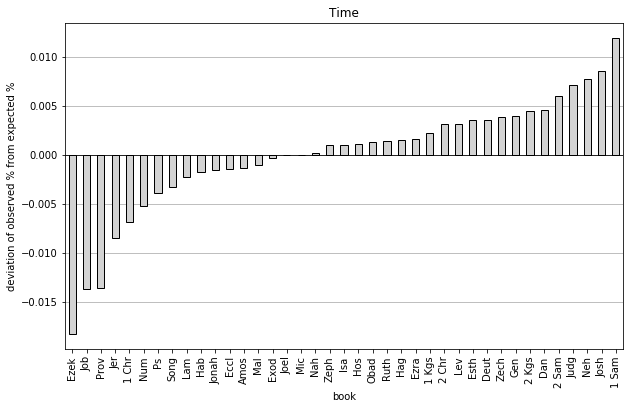

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
book_dev_prop.loc['Time'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Time')
savefig('DP_book_Time')
plt.show()

In [27]:
book_dev_prop.loc['Time'].abs().sort_values(ascending=False)

book
Ezek     0.018353
Job      0.013670
Prov     0.013651
1 Sam    0.011941
Josh     0.008608
Jer      0.008496
Neh      0.007716
Judg     0.007108
1 Chr    0.006906
2 Sam    0.006059
Num      0.005250
Dan      0.004592
2 Kgs    0.004463
Gen      0.003988
Ps       0.003894
Zech     0.003865
Deut     0.003590
Esth     0.003528
Song     0.003245
Lev      0.003183
2 Chr    0.003103
Lam      0.002224
1 Kgs    0.002216
Hab      0.001784
Ezra     0.001652
Hag      0.001551
Jonah    0.001524
Eccl     0.001428
Ruth     0.001371
Obad     0.001333
Amos     0.001300
Hos      0.001147
Mal      0.001078
Isa      0.001002
Zeph     0.000969
Exod     0.000315
Nah      0.000202
Joel     0.000052
Mic      0.000017
Name: Time, dtype: float64

**Adjunct**

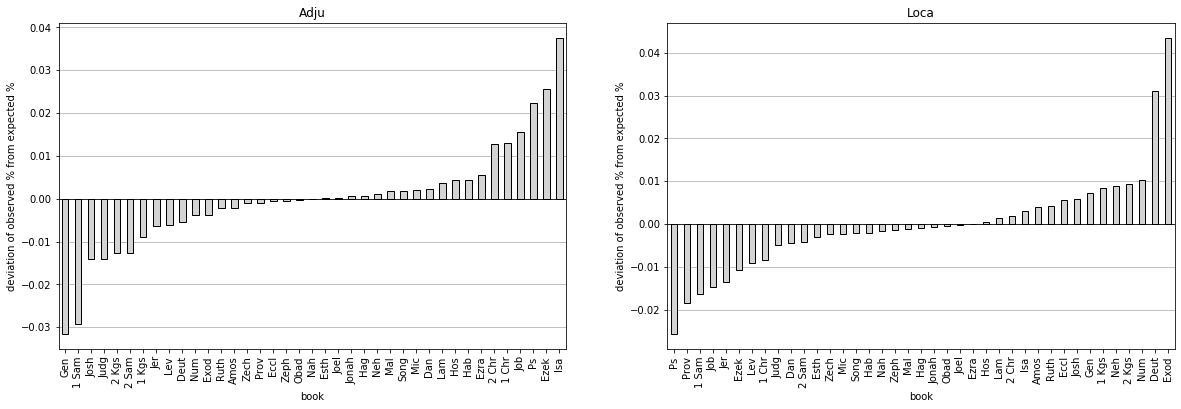

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax = ax1
book_dev_prop.loc['Adju'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Adju')

ax=ax2
book_dev_prop.loc['Loca'].sort_values().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('Loca')

savefig('DP_book_Adju_Loca')

plt.show()

In [29]:
book_dev_prop.loc['Adju'].abs().sort_values(ascending=False)

book
Isa      0.037549
Gen      0.031666
1 Sam    0.029324
Ezek     0.025723
Ps       0.022455
Job      0.015633
Josh     0.014048
Judg     0.013934
1 Chr    0.012965
2 Chr    0.012891
2 Kgs    0.012678
2 Sam    0.012611
1 Kgs    0.008804
Jer      0.006335
Lev      0.006182
Ezra     0.005637
Deut     0.005465
Hab      0.004357
Hos      0.004340
Num      0.003849
Exod     0.003836
Lam      0.003716
Dan      0.002408
Ruth     0.002213
Amos     0.002120
Mic      0.002054
Song     0.001932
Mal      0.001832
Zech     0.001038
Neh      0.001035
Prov     0.000868
Hag      0.000712
Eccl     0.000620
Jonah    0.000569
Zeph     0.000415
Joel     0.000266
Esth     0.000247
Obad     0.000230
Nah      0.000084
Name: Adju, dtype: float64

In [30]:
book_dev_prop.loc['Loca'].abs().sort_values(ascending=False)

book
Exod     0.043393
Deut     0.031013
Ps       0.025620
Prov     0.018350
1 Sam    0.016130
Job      0.014454
Jer      0.013319
Ezek     0.010620
Num      0.010236
2 Kgs    0.009445
Lev      0.009094
Neh      0.009031
1 Kgs    0.008357
1 Chr    0.008227
Gen      0.007390
Josh     0.005997
Eccl     0.005625
Judg     0.004896
Ruth     0.004297
Dan      0.004231
2 Sam    0.004126
Amos     0.003934
Isa      0.003220
Esth     0.002930
Zech     0.002316
Mic      0.002205
Song     0.002034
2 Chr    0.001990
Hab      0.001892
Lam      0.001522
Nah      0.001442
Zeph     0.001387
Mal      0.000963
Hag      0.000751
Jonah    0.000698
Hos      0.000454
Obad     0.000311
Ezra     0.000187
Joel     0.000099
Name: Loca, dtype: float64

### DP by chapter

In [31]:
funct_sample2 = funct_sample.copy()
funct_sample2['chapter_node'] = [L.u(ph,'chapter')[0] for ph in funct_sample.index]

In [32]:
chapt_counts = pd.pivot_table(
    funct_sample2,
    index='function',
    columns=['chapter_node'],
    aggfunc='size',
    fill_value=0,
)

chapt_counts

chapter_node,426624,426625,426626,426627,426628,426629,426630,426631,426632,426633,...,427543,427544,427545,427546,427547,427548,427549,427550,427551,427552
function,,,,,,,,,,,,,,,,,,,,,
Adju,15,4,9,3,4,6,9,5,9,16,...,4,19,28,21,22,22,13,17,27,13
Cmpl,28,31,40,34,3,26,20,27,33,16,...,9,48,37,41,25,58,38,66,42,36
Loca,4,3,2,1,0,7,5,2,4,3,...,5,5,1,3,4,1,8,2,2,3
Objc,38,29,24,36,38,23,10,17,20,15,...,6,25,36,31,23,43,30,50,22,28
Subj,62,41,38,48,35,39,35,32,34,37,...,12,32,56,34,23,48,25,36,38,25
Time,1,5,5,7,19,4,11,22,7,4,...,5,7,8,11,2,7,6,6,11,7


In [33]:
ch_exp_prop = chapt_counts.sum(0) / chapt_counts.sum(0).sum()
ch_obv_prop = chapt_counts.div(chapt_counts.sum(1), 0)
ch_dev_prop = ch_obv_prop.sub(ch_exp_prop, 1)
ch_DP = abs(ch_dev_prop).sum(1) / 2
ch_DP = ch_DP.sort_values()

ch_DP

function
Subj    0.106514
Cmpl    0.115119
Objc    0.125964
Adju    0.232061
Time    0.268718
Loca    0.344149
dtype: float64

### DP determined using clause clusters

In [34]:
# build clusters of clauses into a column that can be added DF
cluster_size = 50
cl_clusters = []
this_cluster = []
for cl in F.otype.s('clause'):
    this_cluster.append(cl)
    if len(this_cluster) == cluster_size:
        cl_clusters.append(this_cluster)
        this_cluster = []
cl_clusters.append(this_cluster) # finish the last short cluster
        
print(len(cl_clusters), 'clusters of size', cluster_size, 'built')
print(len(cl_clusters[-1]), 'short cluster added')

# map clustesr to sets of clauses
# that can be used for membership checks
clauses_2_id = []
for i, cluster in enumerate(cl_clusters):
    clauses_2_id.append((set(cluster), i))

# make a new column for the DF that maps a phrase 
# to its clause cluster group
phrase_clust_group = []
for ph in funct_sample.index:
    cl = L.u(ph, 'clause')[0]
    for clauses, cluster in clauses_2_id:
        if cl in clauses:
            phrase_clust_group.append(cluster)
            continue
            
print(len(phrase_clust_group), 'phrases assigned to clusters')

1763 clusters of size 50 built
21 short cluster added
99946 phrases assigned to clusters


In [35]:
funct_sample3 = funct_sample.copy()
funct_sample3['cl_cluster'] = phrase_clust_group

In [36]:
cl_counts = pd.pivot_table(
    funct_sample3,
    index='function',
    columns=['cl_cluster'],
    aggfunc='size',
    fill_value=0,
)
cl_counts

cl_cluster,0,1,2,3,4,5,6,7,8,9,...,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762
function,,,,,,,,,,,,,,,,,,,,,
Adju,3,10,3,2,5,4,1,0,6,1,...,14,6,6,4,5,12,20,3,10,2
Cmpl,10,11,13,17,18,22,19,19,4,3,...,16,22,18,22,24,23,14,26,25,5
Loca,1,3,0,3,0,2,0,1,0,0,...,1,4,3,2,0,1,1,0,2,1
Objc,14,14,18,15,7,12,16,18,27,23,...,17,17,9,21,15,19,14,9,13,8
Subj,31,23,21,21,21,17,19,23,23,22,...,19,9,13,10,15,13,25,16,10,9
Time,1,0,4,1,0,3,3,3,10,12,...,3,3,5,1,1,2,8,4,3,2


In [37]:
cl_exp_prop = cl_counts.sum(0) / cl_counts.sum(0).sum()
cl_obv_prop = cl_counts.div(cl_counts.sum(1), 0)
cl_dev_prop = cl_obv_prop.sub(cl_exp_prop, 1)
cl_DP = abs(cl_dev_prop).sum(1) / 2
cl_DP = cl_DP.sort_values()

cl_DP

function
Subj    0.124915
Cmpl    0.128607
Objc    0.149116
Adju    0.262407
Time    0.330507
Loca    0.422433
dtype: float64

### subplots of book, chapter, and cluster DP

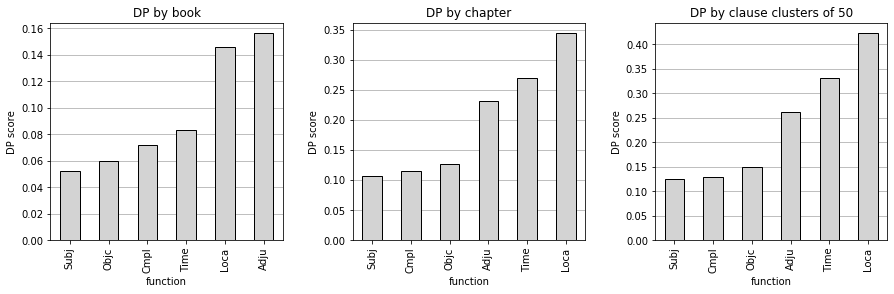

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
axs = axs.ravel()
titles = ['DP by book', 'DP by chapter', 'DP by clause clusters of 50']
plt.subplots_adjust(wspace=0.3)

all_dps = [book_DP, ch_DP, cl_DP]

for i, dp in enumerate(all_dps):
    ax=axs[i]
    dp.plot(kind='bar', ax=ax, color='lightgrey', edgecolor='black')
    ax.set_xlabel('function')
    ax.set_ylabel('DP score')
    ax.grid(axis='y')
    ax.set_axisbelow(True) 
    ax.set_title(titles[i])

savefig('DP_functions')

In [39]:
DP_book_ch_cl = pd.concat(all_dps, 1, sort=True)
DP_book_ch_cl.columns = ['book DP', 'chapter DP', 'clause cl. DP']
DP_book_ch_cl = DP_book_ch_cl.loc[DP_book_ch_cl.sum(1).sort_values().index]

#DP_book_ch_cl.round(2).to_clipboard()

DP_book_ch_cl

,book DP,chapter DP,clause cl. DP
Subj,0.052235,0.106514,0.124915
Cmpl,0.072055,0.115119,0.128607
Objc,0.059881,0.125964,0.149116
Adju,0.156321,0.232061,0.262407
Time,0.083187,0.268718,0.330507
Loca,0.146092,0.344149,0.422433
